In [33]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Importing Dataset

In [12]:
df = pd.read_csv("Gari.csv")
df

C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_15544\1340684755.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Gari.csv")


,User ID,Gender,Age,EstimatedSalary,Purchased,Sex
0,15624510.0,Male,19.0,19000.0,0.0,1
1,15810944.0,Male,35.0,20000.0,0.0,1
2,15668575.0,Male,26.0,43000.0,0.0,1
3,15603246.0,Female,27.0,57000.0,0.0,0
4,15804002.0,Female,19.0,76000.0,0.0,0
...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,0
1048571,NaN,NaN,NaN,NaN,NaN,0
1048572,NaN,NaN,NaN,NaN,NaN,0
1048573,NaN,NaN,NaN,NaN,NaN,0


Data Wrangling

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   User ID          400 non-null      float64
 1   Gender           401 non-null      object 
 2   Age              400 non-null      float64
 3   EstimatedSalary  400 non-null      float64
 4   Purchased        400 non-null      float64
 5   Sex              1048575 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 48.0+ MB


In [14]:
df =df.drop(["User ID", "Gender"], axis =1)
df

,Age,EstimatedSalary,Purchased,Sex
0,19.0,19000.0,0.0,1
1,35.0,20000.0,0.0,1
2,26.0,43000.0,0.0,1
3,27.0,57000.0,0.0,0
4,19.0,76000.0,0.0,0
...,...,...,...,...
1048570,NaN,NaN,NaN,0
1048571,NaN,NaN,NaN,0
1048572,NaN,NaN,NaN,0
1048573,NaN,NaN,NaN,0


In [17]:
df = df.dropna()
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
Sex                0
dtype: int64

In [18]:
df.describe()

,Age,EstimatedSalary,Purchased,Sex
count,400.000000,400.000000,400.000000,400.00000
mean,37.655000,69742.500000,0.357500,0.49250
std,10.482877,34096.960282,0.479864,0.50057
min,18.000000,15000.000000,0.000000,0.00000
25%,29.750000,43000.000000,0.000000,0.00000
50%,37.000000,70000.000000,0.000000,0.00000
75%,46.000000,88000.000000,1.000000,1.00000
max,60.000000,150000.000000,1.000000,1.00000


C:\Users\SCIENCE\AppData\Local\Temp\ipykernel_15544\741476896.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Purchased)


<Axes: xlabel='Purchased', ylabel='Density'>

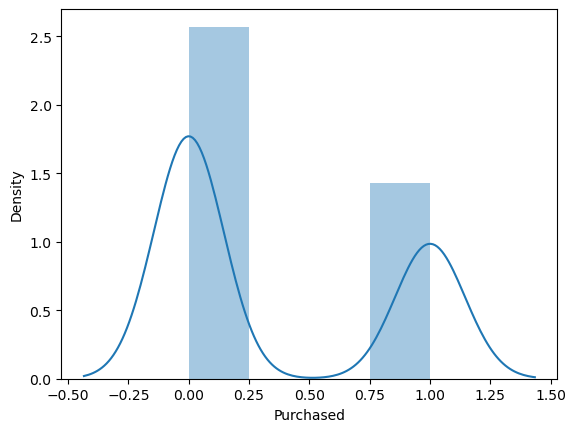

In [25]:
sns.distplot(df.Purchased)

<Axes: >

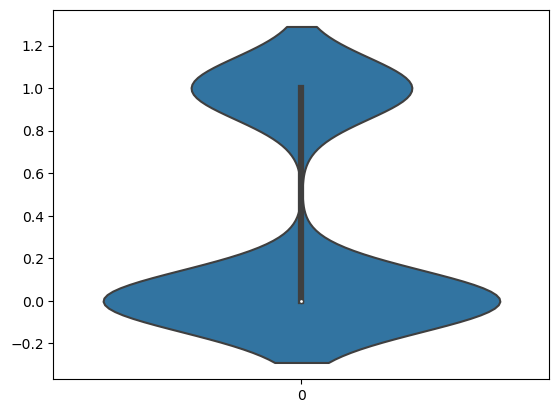

In [50]:
sns.violinplot(df["Purchased"])

In [21]:
x = df.iloc[:, [0, 1, 3]].values
y = df.iloc[:, [2]]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

Creating the Model and Analysing Its Performance

In [29]:
gaus = GaussianNB()
gaus.fit(x_train, y_train)
y1_pred =gaus.predict(x_test)
y1_pred

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       1.])

In [31]:
print(classification_report(y1_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.89      0.91        81
         1.0       0.79      0.87      0.83        39

    accuracy                           0.88       120
   macro avg       0.86      0.88      0.87       120
weighted avg       0.89      0.88      0.88       120



In [32]:
print(confusion_matrix(y1_pred, y_test))

[[72  9]
 [ 5 34]]


In [34]:
print(accuracy_score(y1_pred, y_test))

0.8833333333333333


Predicting Using the Above Model

In [35]:
xnew = [[38, 75000, 1]]

In [38]:
y2_pred =gaus.predict(xnew)
y2_pred

array([0.])